In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy import integrate
import warnings

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

In [2]:
# try to parse the dates right at the beginning 
# it works out of the box if the date was stored ISO YYYY-MM-DD format

df_analyse=pd.read_csv('new_COVID_small_flat_table.csv',sep=';')  
df_analyse.sort_values('date',ascending=True).tail()

,date,Italy,US,Spain,Germany,"Korea, South"
912,2022-07-22,20539016,90367064,13204863,30331131,19146180
913,2022-07-23,20608190,90390185,13204863,30331133,19211613
914,2022-07-24,20660065,90410386,13204863,30331133,19247496
915,2022-07-25,20684182,90567290,13204863,30476605,19346764
916,2022-07-26,20772833,90733888,13203228,30598385,19446946


In [21]:
# set some basic parameters
# beta/gamma is denoted as  'basic reproduction number'

N0=1000000 #max susceptible population
beta=0.6  # infection spread dynamics
gamma=0.2  # recovery rate


# condition I0+S0+R0=N0
I0=df_analyse.Germany[50]
S0=N0-I0
R0=0

In [22]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])


# Simulative approach to calculate SIR curves

In [23]:

SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_t in np.arange(100):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)


C:\Users\Abhishek Padir\AppData\Local\Temp\ipykernel_19704\3919566462.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Abhishek Padir\AppData\Local\Temp\ipykernel_19704\3919566462.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Abhishek Padir\AppData\Local\Temp\ipykernel_19704\3919566462.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Abhishek Padir\AppData\Local\Temp\ipykernel_19704\3919566462.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a

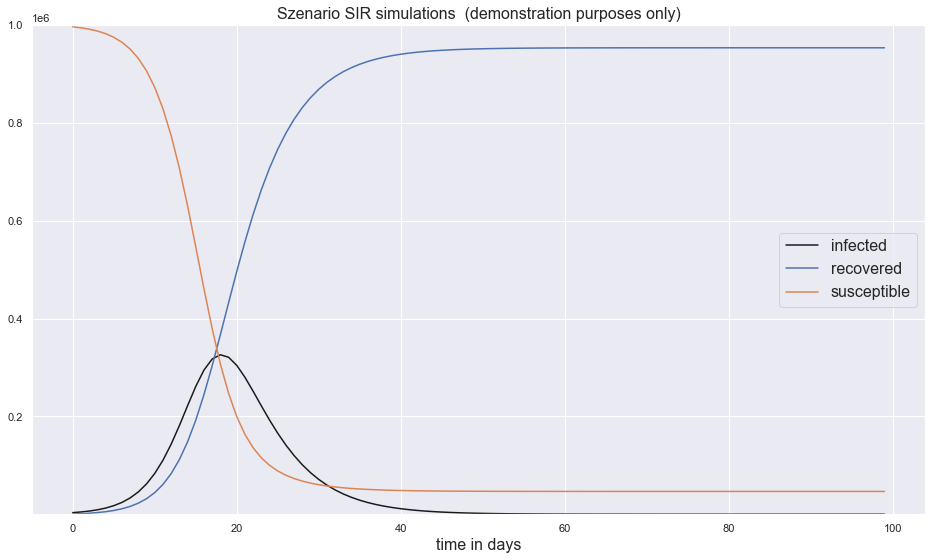

In [24]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

# Fitting the parameters of SIR model

In [25]:


ydata = np.array(df_analyse.Germany[45:])
t=np.arange(len(ydata))

In [26]:
# ensure re-initialization 
I0=ydata[0]
S0=N0-I0
R0=0
beta

0.6

In [27]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [28]:


def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI

In [29]:
# example curve of our differential equationa
popt=[0.4,0.1]
fit_odeint(t, *popt)

array([ 6.84000000e+02,  9.22994932e+02,  1.24531146e+03,  1.67984649e+03,
        2.26539457e+03,  3.05393633e+03,  4.11493676e+03,  5.54089425e+03,
        7.45438066e+03,  1.00167476e+04,  1.34384856e+04,  1.79908072e+04,
        2.40172344e+04,  3.19426029e+04,  4.22747765e+04,  5.55914822e+04,
        7.25015921e+04,  9.35685728e+04,  1.19187065e+05,  1.49416224e+05,
        1.83798312e+05,  2.21222756e+05,  2.59915264e+05,  2.97611734e+05,
        3.31906856e+05,  3.60678200e+05,  3.82439797e+05,  3.96512905e+05,
        4.02991270e+05,  4.02560495e+05,  3.96262556e+05,  3.85279781e+05,
        3.70775846e+05,  3.53799809e+05,  3.35241683e+05,  3.15823032e+05,
        2.96107790e+05,  2.76522598e+05,  2.57379972e+05,  2.38900571e+05,
        2.21232905e+05,  2.04469885e+05,  1.88662299e+05,  1.73829533e+05,
        1.59967971e+05,  1.47057510e+05,  1.35066544e+05,  1.23955764e+05,
        1.13681025e+05,  1.04195489e+05,  9.54512116e+04,  8.74003024e+04,
        7.99957590e+04,  

In [30]:
# the resulting curve has to be fitted
# free parameters are here beta and gamma

In [31]:
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])



C:\Users\Abhishek Padir\AppData\Local\Temp\ipykernel_19704\649699423.py:16: RuntimeWarning: overflow encountered in double_scalars
  dS_dt=-beta*S*I/N0          #S*I is the
C:\Users\Abhishek Padir\AppData\Local\Temp\ipykernel_19704\649699423.py:17: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
C:\Users\Abhishek Padir\AppData\Local\Temp\ipykernel_19704\649699423.py:18: RuntimeWarning: overflow encountered in double_scalars
  dR_dt=gamma*I


standard deviation errors :  [6.97541285e-04 1.73197345e-05]  start infect: 684
Optimal parameters: beta = 0.10454158539589002  and gamma =  -0.004193563079730458


In [32]:
# get the final fitted curve
fitted=fit_odeint(t, *popt)

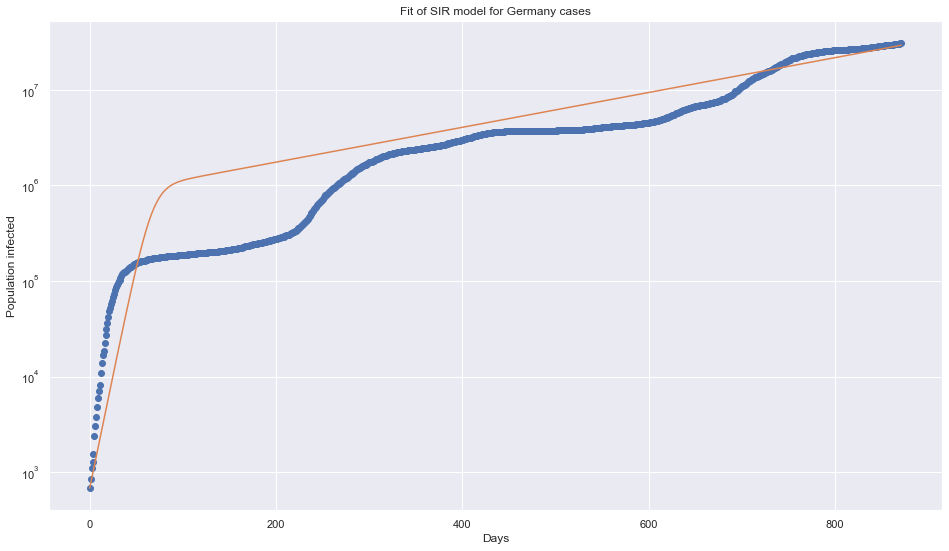

Optimal parameters: beta = 0.10454158539589002  and gamma =  -0.004193563079730458
Basic Reproduction Number R0  -24.929059944558993
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


In [33]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
plt.title("Fit of SIR model for Germany cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki")

In [16]:
t_initial=28
t_intro_measures=14
t_hold=21
t_relax=21

beta_max=0.4
beta_min=0.11
gamma=0.1
pd_beta=np.concatenate((np.array(t_initial*[beta_max]),
                       np.linspace(beta_max,beta_min,t_intro_measures),
                       np.array(t_hold*[beta_min]),
                        np.linspace(beta_min,beta_max,t_relax),
                       ))

In [17]:
pd_beta


array([0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.37769231,
       0.35538462, 0.33307692, 0.31076923, 0.28846154, 0.26615385,
       0.24384615, 0.22153846, 0.19923077, 0.17692308, 0.15461538,
       0.13230769, 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.1245    ,
       0.139     , 0.1535    , 0.168     , 0.1825    , 0.197     ,
       0.2115    , 0.226     , 0.2405    , 0.255     , 0.2695 

In [18]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_beta in pd_beta:
   
    new_delta_vec=SIR_model(SIR,each_beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

C:\Users\Abhishek Padir\AppData\Local\Temp\ipykernel_19704\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Abhishek Padir\AppData\Local\Temp\ipykernel_19704\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Abhishek Padir\AppData\Local\Temp\ipykernel_19704\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Abhishek Padir\AppData\Local\Temp\ipykernel_19704\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a

In [19]:
propagation_rates

,susceptible,infected,recoverd,recovered
0,999042.587142,889.012858,NaN,68.400000
1,998687.32246,1155.376254,NaN,157.301286
2,998225.778613,1501.382476,NaN,272.838911
3,997626.291137,1950.731704,NaN,422.977159
4,996847.850643,2534.099028,NaN,618.050329
5,995837.406175,3291.133593,NaN,871.460232
6,994526.432599,4272.99381,NaN,1200.573591
7,992826.590483,5545.536545,NaN,1627.872972
8,990624.288027,7193.285346,NaN,2182.426627
9,987773.950757,9324.294082,NaN,2901.755161


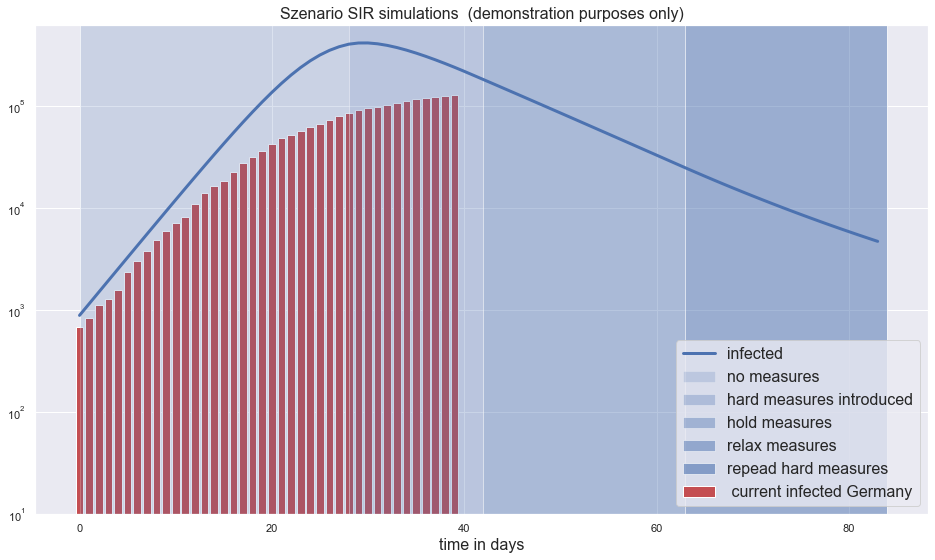

In [20]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',linewidth=3)

t_phases=np.array([t_initial,t_intro_measures,t_hold,t_relax]).cumsum()
ax1.bar(np.arange(len(ydata[0:40])),ydata[0:40],width = 0.8,label=' current infected Germany',color='r')
ax1.axvspan(0,t_phases[0], facecolor='b', alpha=0.2,label='no measures')
ax1.axvspan(t_phases[0],t_phases[1], facecolor='b', alpha=0.3,label='hard measures introduced')
ax1.axvspan(t_phases[1],t_phases[2], facecolor='b', alpha=0.4,label='hold measures')
ax1.axvspan(t_phases[2],t_phases[3], facecolor='b', alpha=0.5,label='relax measures')
ax1.axvspan(t_phases[3],len(propagation_rates.infected), facecolor='b', alpha=0.6,label='repead hard measures')

ax1.set_ylim(10, 1.5*max(propagation_rates.infected))
ax1.set_yscale('log')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

In [34]:
t_phases

array([28, 42, 63, 84])

# Dynamic Dashboard

In [ ]:
import pandas as pd
import numpy as np

import dash
dash.__version__
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output,State
from SIR_model_func import SIR_modelling

import plotly.graph_objects as go
from scipy import optimize
from scipy import integrate

import os
print(os.getcwd())
df_analyse = pd.read_csv('new_COVID_final_set.csv', sep = ';')
df_analyse = df_analyse[['date', 'country', 'confirmed']]
df_final = df_analyse[(df_analyse['country']== 'Italy') | (df_analyse['country']== 'Canada') | (df_analyse['country']== 'Kuwait')]

fig = go.Figure()
app = dash.Dash()
app.layout = html.Div([
    
    dcc.Markdown('''
                 
    # Implmentation of SIR model for 3 countries
    
    '''),
    
    
    dcc.Dropdown(
        id = 'country_drop_down',
        options=[ {'label': each,'value':each} for each in df_final['country'].unique()],
        value= 'Canada', # which are pre-selected
        multi=False),
    
    dcc.Graph(figure = fig, id = 'SIR_graph')
    ])
                 
def SIR(countries):
    
    SIR_modelling()
    
    
@app.callback(
    Output('SIR_graph', 'figure'),
    [Input('country_drop_down', 'value')])

def update_SIR_figure(country_drop_down):
    
    traces = []
    
    df_plot = df_final[df_final['country'] == country_drop_down]
    df_plot = df_plot.groupby(['country', 'date']).agg(np.sum).reset_index()
    df_plot.sort_values('date', ascending = True).head()
    df_plot = df_plot.confirmed[35:]
    
    t, fitted = SIR_modelling(df_plot)
    
    traces.append(dict (x = t,
                        y = fitted,
                        mode = 'lines',
                        opacity = 0.9,
                        name = 'SIR-fit')
                  )
    
    traces.append(dict (x = t,
                        y = df_plot,
                        mode = 'markers',
                        opacity = 0.9,
                        name = 'Original Data')
                  )
    
    return {
            'data': traces,
            'layout': dict (
                width=1280,
                height=720,
                title = 'SIR model fitting',

                xaxis= {'title':'Days',
                       'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                      },

                yaxis={'title': "Infected population"}
        )
    }


if __name__ == '__main__':
    
    app.run_server(debug = True, use_reloader = False)